In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')

# Time Series (Hotel Booking)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# Text Analytics (Bag of Wrods)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Time Series
# Real-world dataset: Hotel Booking

In [2]:
df_hotel = pd.read_csv('hotel_booking.csv')

In [3]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,9/7/2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
df_hotel.dtypes.value_counts()

object     16
int64      16
float64     4
dtype: int64

In [6]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df_hotel.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [8]:
# We will convert dtype 'object' to 'datetime'

df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'])

In [9]:
df_hotel['reservation_status_date'].dtype

dtype('<M8[ns]')

In [10]:
df_hotel['reservation_status_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]

In [11]:
# Set Index
df_hotel.set_index('reservation_status_date', inplace=True)

In [12]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2015-07-02,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
2015-07-02,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
2015-07-03,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [13]:
# Exploring the dates
df_hotel.index

DatetimeIndex(['2015-07-01', '2015-07-01', '2015-07-02', '2015-07-02',
               '2015-07-03', '2015-07-03', '2015-07-03', '2015-07-03',
               '2015-05-06', '2015-04-22',
               ...
               '2017-09-04', '2017-09-05', '2017-09-05', '2017-09-06',
               '2017-09-06', '2017-09-06', '2017-09-07', '2017-09-07',
               '2017-09-07', '2017-09-07'],
              dtype='datetime64[ns]', name='reservation_status_date', length=119390, freq=None)

In [14]:
# ValueError: cannot reindex on an axis with duplicate labels
# We will remove duplicate dates

df_hotel = df_hotel[~df_hotel.index.duplicated(keep='first')]
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2015-07-02,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
2015-07-03,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498
2015-05-06,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.00,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
2015-04-22,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.50,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [15]:
# Modify the index to daily frequency

df_hotel = df_hotel.asfreq("D") # Change the frecuency to daily
df_hotel.index

DatetimeIndex(['2014-10-17', '2014-10-18', '2014-10-19', '2014-10-20',
               '2014-10-21', '2014-10-22', '2014-10-23', '2014-10-24',
               '2014-10-25', '2014-10-26',
               ...
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14'],
              dtype='datetime64[ns]', name='reservation_status_date', length=1064, freq='D')

In [16]:
# Resample the DataFrame to Weekly frequency

df_weekly = df_hotel.resample('W').sum()
df_weekly.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
reservation_status_date,,,,,,,,,,,,,,,,,,,,
2014-10-19,1.00,265.00,2015.00,28.00,9.00,0.00,2.00,2.00,0.00,0.00,1.00,21.00,0.00,0.00,1.00,0.00,0.00,62.80,0.00,0.00
2014-10-26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014-11-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Performing adFuller to check for stationarity

In [17]:
# MissingDataError: exog contains inf or nans

# adfuller(df_hotel['adr'])

In [18]:
# Checking for NaN values

df_hotel['adr'].isna().value_counts()

False    926
True     138
Name: adr, dtype: int64

In [19]:
# Checking for Inf values

np.isinf(df_hotel['adr']).value_counts()

False    1064
Name: adr, dtype: int64

In [20]:
df_hotel['adr'].sort_values(ascending=False)

reservation_status_date
2016-07-27   369.00
2016-12-30   340.00
2017-06-25   315.00
2017-07-23   292.00
2017-08-12   290.00
              ...  
2015-06-07      NaN
2015-06-21      NaN
2015-06-28      NaN
2017-09-11      NaN
2017-09-13      NaN
Name: adr, Length: 1064, dtype: float64

In [21]:
# Dropping NaN from column 'adr'

df_hotel.dropna(subset=['adr'], inplace=True)

In [22]:
print('NaN values in ADR:', df_hotel['adr'].isna().sum())

NaN values in ADR: 0


In [23]:
df_hotel['adr'].describe()

count   926.00
mean     92.76
std      57.16
min       0.00
25%      50.01
50%      78.00
75%     123.75
max     369.00
Name: adr, dtype: float64

## Weekly ADR Plot

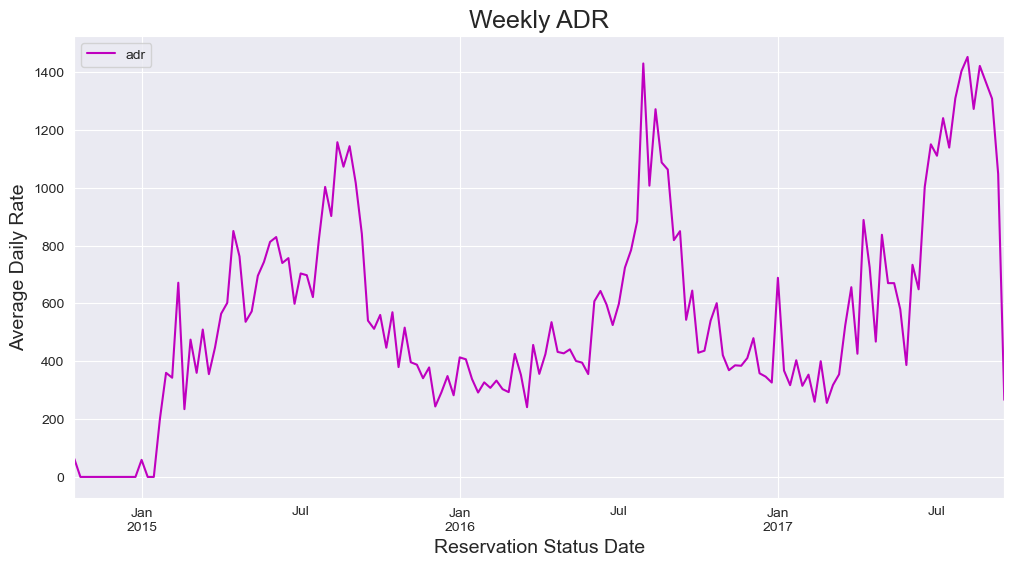

In [24]:
df_weekly[['adr']].plot(figsize=(12, 6), color='m')

plt.title('Weekly ADR',fontsize=18)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xlabel('Reservation Status Date', fontsize=14);

Augmented Dickey Fuller test (ADF Test) is identified as the common statistical test employed to test whether a given Time Series is stationary or not.

If our Time Series is Stationary then we can apply ARMA model otherwise we have to apply a more complex model (ARIMA)

if p-value is small then reject null hypothesis non-stationary ----> 0.05

We need to make this plot stationary

In [25]:
adfuller(df_hotel['adr'])

(-2.391424161384229,
 0.14417151984254284,
 12,
 913,
 {'1%': -3.4375326734225844,
  '5%': -2.8647108493902986,
  '10%': -2.568458364370556},
 9220.227185797383)

**it is not stationary ---> p-value > 0.05 (0.14417151984254284)**

### Autocorrelation

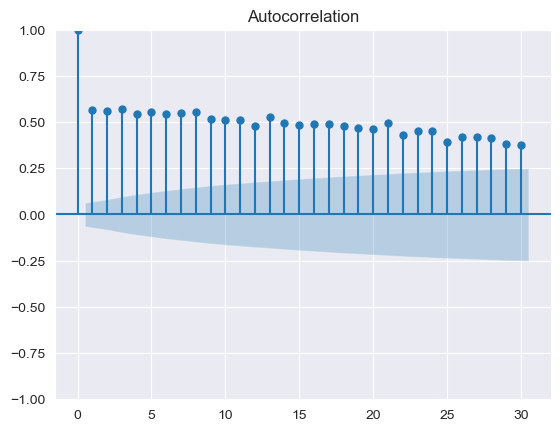

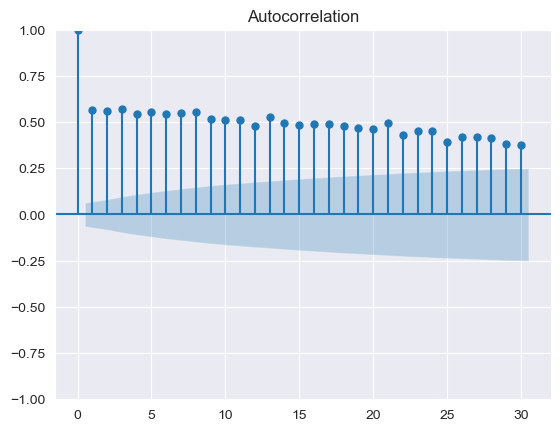

In [26]:
plot_acf(df_hotel['adr'])

### Partial Autocorrelation

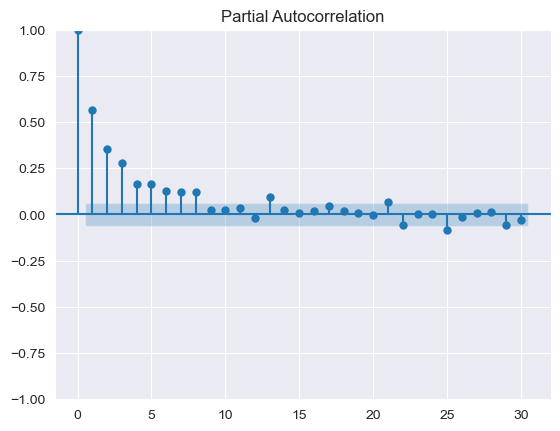

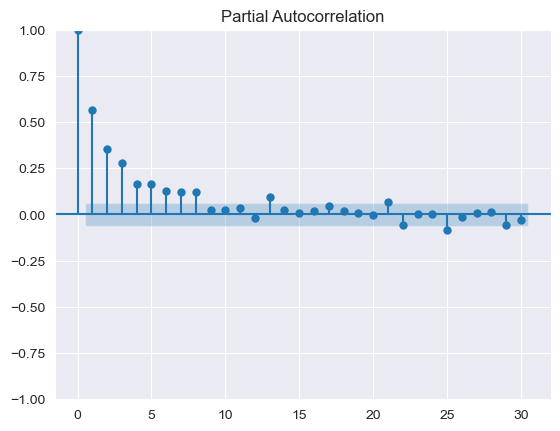

In [27]:
plot_pacf(df_hotel['adr'], method='ywm')

ACF - Exponential decay => no MA (q=0)

PACF - Significant value at lag 1 ie p=1

### Split data 80% for train set and 20% for test set

In [28]:
df_hotel.shape

(926, 35)

In [29]:
# Split training set 80% & Test Set 20%
split = int(df_hotel.shape[0] * 0.8)
split

740

In [30]:
df_train = df_hotel[:split] # rows from index 0 up to, but not including, the index specified by the variable split
df_test = df_hotel[split:] # It starts from the index specified by split and goes up to, and including, the end of the DF

In [31]:
print('Train Set:',df_train.shape)
print('Test Set:',df_test.shape)

Train Set: (740, 35)
Test Set: (186, 35)


In [32]:
df_train.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2017-03-06,Resort Hotel,1.00,4.00,2017.00,March,10.00,6.00,1.00,0.00,1.00,...,0.00,Transient,30.00,0.00,0.00,No-Show,Timothy Bray,Timothy.B@hotmail.com,828-385-3287,************3519
2017-03-07,Resort Hotel,1.00,88.00,2017.00,March,10.00,11.00,2.00,5.00,2.00,...,0.00,Transient-Party,34.00,0.00,0.00,Canceled,David Turner,DTurner@att.com,842-680-3576,************3180
2017-03-08,Resort Hotel,1.00,2.00,2017.00,March,10.00,8.00,0.00,1.00,1.00,...,0.00,Transient,35.00,0.00,0.00,Canceled,Amber Vargas,AVargas83@zoho.com,353-277-3623,************9039
2017-03-09,Resort Hotel,1.00,211.00,2017.00,March,10.00,9.00,0.00,1.00,1.00,...,0.00,Transient,33.30,0.00,0.00,No-Show,Ross Pruitt,Pruitt_Ross53@gmail.com,176-954-6960,************6910
2017-03-10,Resort Hotel,1.00,16.00,2017.00,March,10.00,10.00,0.00,2.00,2.00,...,0.00,Transient,80.00,0.00,0.00,No-Show,Renee Lee,Lee.Renee67@outlook.com,418-276-2908,************1115


In [33]:
adfuller(df_train['adr'])

(-2.3694625392647364,
 0.15054149513940485,
 12,
 727,
 {'1%': -3.439376877165393,
  '5%': -2.865523768488869,
  '10%': -2.5688914082860164},
 7179.131344864171)

**After training and testing the dataset, it remains non-stationary, as the p-value > 0.05 (0.15054149513940485). Therefore, we will perform ARIMA**

# ARIMA

Since the time series is not stationary, it needs to be stationarised through differencing

In [34]:
adfuller(df_train['adr'].diff(1).dropna()) # First row would be NaN so we have to drop it.

(-11.829723377764175,
 8.044706107668088e-22,
 11,
 727,
 {'1%': -3.439376877165393,
  '5%': -2.865523768488869,
  '10%': -2.5688914082860164},
 7172.253351688272)

**We needed diff(1) to get a p-value less than the significance level of 0.05 (8.044706107668088e-22), suggesting the time series is stationary**

The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

### Differenced Average Daily Rate over Reservation Dates

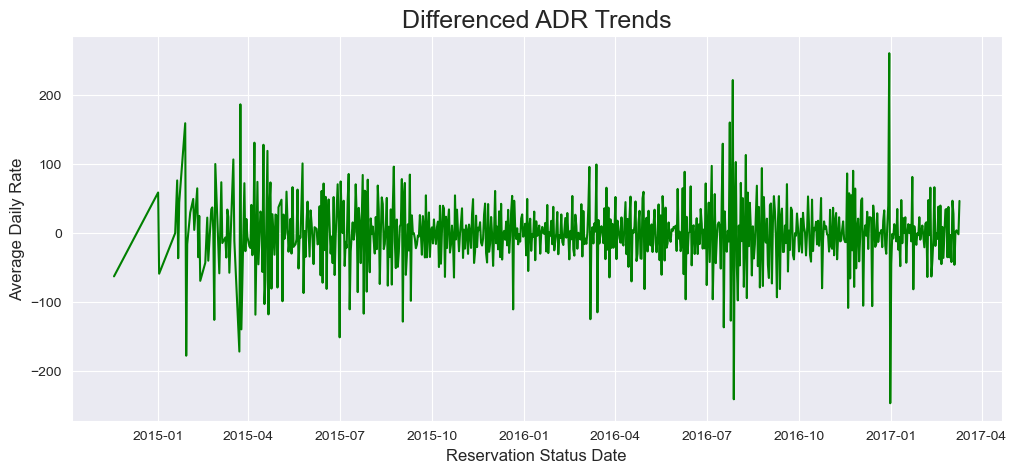

In [35]:
plt.figure(figsize= [12, 5])

plt.plot(df_train['adr'].diff(1).dropna(), color='g')

plt.title('Differenced ADR Trends',fontsize=18)
plt.ylabel('Average Daily Rate',fontsize=12)
plt.xlabel('Reservation Status Date',fontsize=12);

### Autocorrelation

In [36]:
df_hotel['Diff'] = df_train['adr'].diff(1)

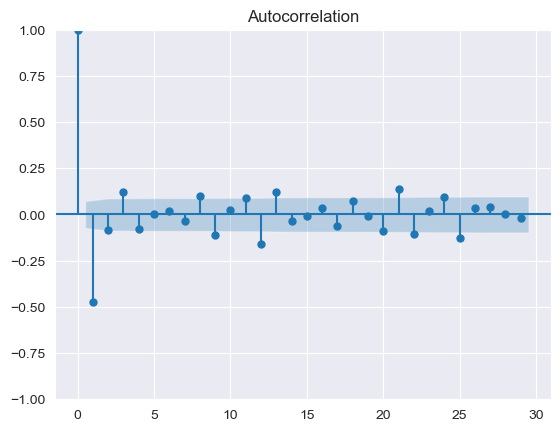

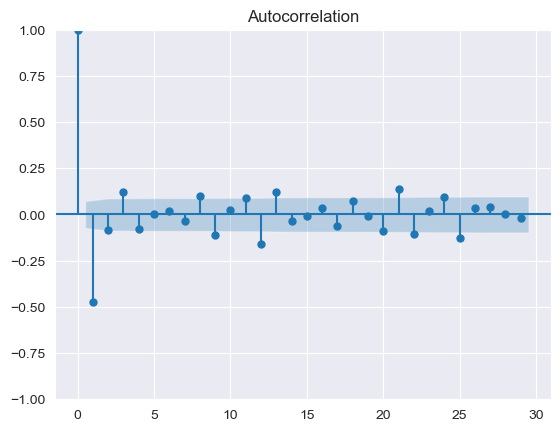

In [37]:
plot_acf(df_hotel['Diff'].dropna())

**The autocorrelations seem to be die down fairly after lag 0, then remain constantly lower**

There seems to be some repitition 1 up, 2 down or 1 up 1 down

There seems to be some seasonality every 3 months and there are small spikes in repitition

There seems to be a correlation in the time of the year

### Partial Autocorrelation

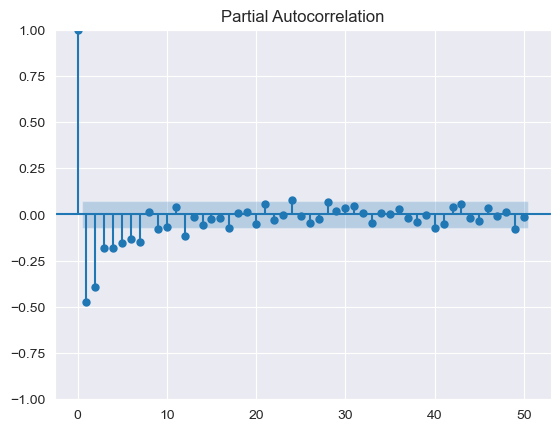

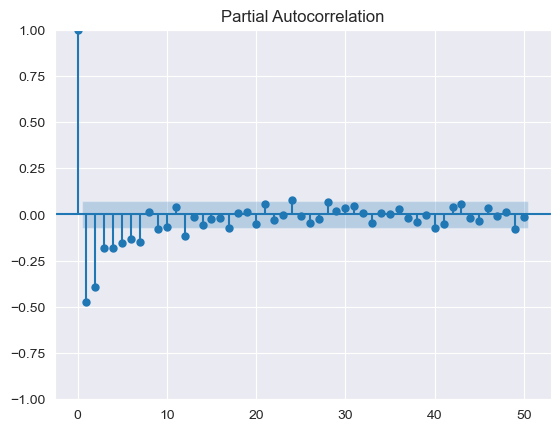

In [38]:
plot_pacf(df_hotel['Diff'].dropna(), method="ywm", lags=50)

**The partial autocorrelations seem to be small after the first one lag, so we decide to fit an ARIMA between 0 and 1**

Here, there seems to be fluctionations in seasonality every 8 months, 6 months, 3 months and so on.

### Reseting the index

A date index has been provided, but it has no associated frequency information so will be ignored when e.g. forecasting.

In [39]:
df_hotel.reset_index(drop=False, inplace=True)

In [40]:
df_hotel.head()

,reservation_status_date,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,Diff
0,2014-10-17,City Hotel,1.00,265.00,2015.00,July,28.00,9.00,0.00,2.00,...,Transient-Party,62.80,0.00,0.00,Canceled,Joseph Wang,JosephWang@hotmail.com,262-054-1486,************3082,NaN
1,2014-11-18,Resort Hotel,1.00,297.00,2015.00,September,36.00,3.00,1.00,3.00,...,Transient,0.00,0.00,0.00,Canceled,Audrey Walker,AWalker21@att.com,625-835-5588,************7803,-62.80
2,2015-01-01,Resort Hotel,1.00,344.00,2015.00,September,37.00,8.00,4.00,10.00,...,Transient,58.95,0.00,0.00,Canceled,Robert Jones,RobertJones92@yandex.com,826-571-3754,************9257,58.95
3,2015-01-02,Resort Hotel,1.00,304.00,2015.00,September,36.00,3.00,0.00,3.00,...,Group,0.00,0.00,0.00,Canceled,Brianna Mejia,BriannaMejia@gmail.com,579-877-3361,************5189,-58.95
4,2015-01-18,Resort Hotel,1.00,336.00,2015.00,September,37.00,7.00,1.00,2.00,...,Group,0.00,0.00,0.00,Canceled,Timothy Clark,Timothy.Clark@comcast.net,902-620-3655,************5474,0.00


## Akaike Information Criterion

Is an indicator to used to evalaute model performance with an objective to minimise AIC

In [41]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [ sm.ARIMA( df_hotel['adr'], order=(p, 0, q) ).fit().aic, p, q  ] ) # Our model and parameters

C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramete

In [42]:
# These are the suggested hyperparameters
aicVals.sort()
aicVals

[[9471.156399826039, 1, 1],
 [9471.714661927508, 4, 4],
 [9472.378265133722, 4, 3],
 [9472.45701698872, 1, 2],
 [9472.496226414085, 2, 1],
 [9473.79326595811, 2, 2],
 [9473.899624150725, 1, 3],
 [9473.925170105656, 3, 1],
 [9474.354998991763, 2, 3],
 [9474.393009810483, 3, 2],
 [9475.316245494092, 3, 3],
 [9475.796748127035, 4, 1],
 [9475.810560440585, 1, 4],
 [9476.273020393603, 4, 2],
 [9476.514982534203, 2, 4],
 [9477.842485370991, 3, 4],
 [9545.82437444069, 4, 0],
 [9570.424901650118, 3, 0],
 [9644.95954485923, 2, 0],
 [9718.404903545614, 0, 4],
 [9754.450445409208, 0, 3],
 [9770.271842812632, 1, 0],
 [9832.040800325722, 0, 2],
 [9922.072232527631, 0, 1],
 [10123.92911128542, 0, 0]]

The output of the above aicVals that ARIMA [1, 1] is the most optimal model with minimum AIC value. Thus ARIMA(1,1) will be preferred over other complex models.


In [43]:
model_arima = sm.ARIMA(df_hotel['adr'], order=(1, 1, 0)).fit()

In [44]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    adr   No. Observations:                  926
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4858.395
Date:                Sun, 12 Nov 2023   AIC                           9720.790
Time:                        19:39:53   BIC                           9730.450
Sample:                             0   HQIC                          9724.475
                                - 926                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4987      0.019    -25.907      0.000      -0.536      -0.461
sigma2      2134.6064     60.923     35.038      0.000    2015.200    2254.013
===================================================================================
Ljung-Box (L1) (Q):                  27.96   Jarque-Bera (JB):               502.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

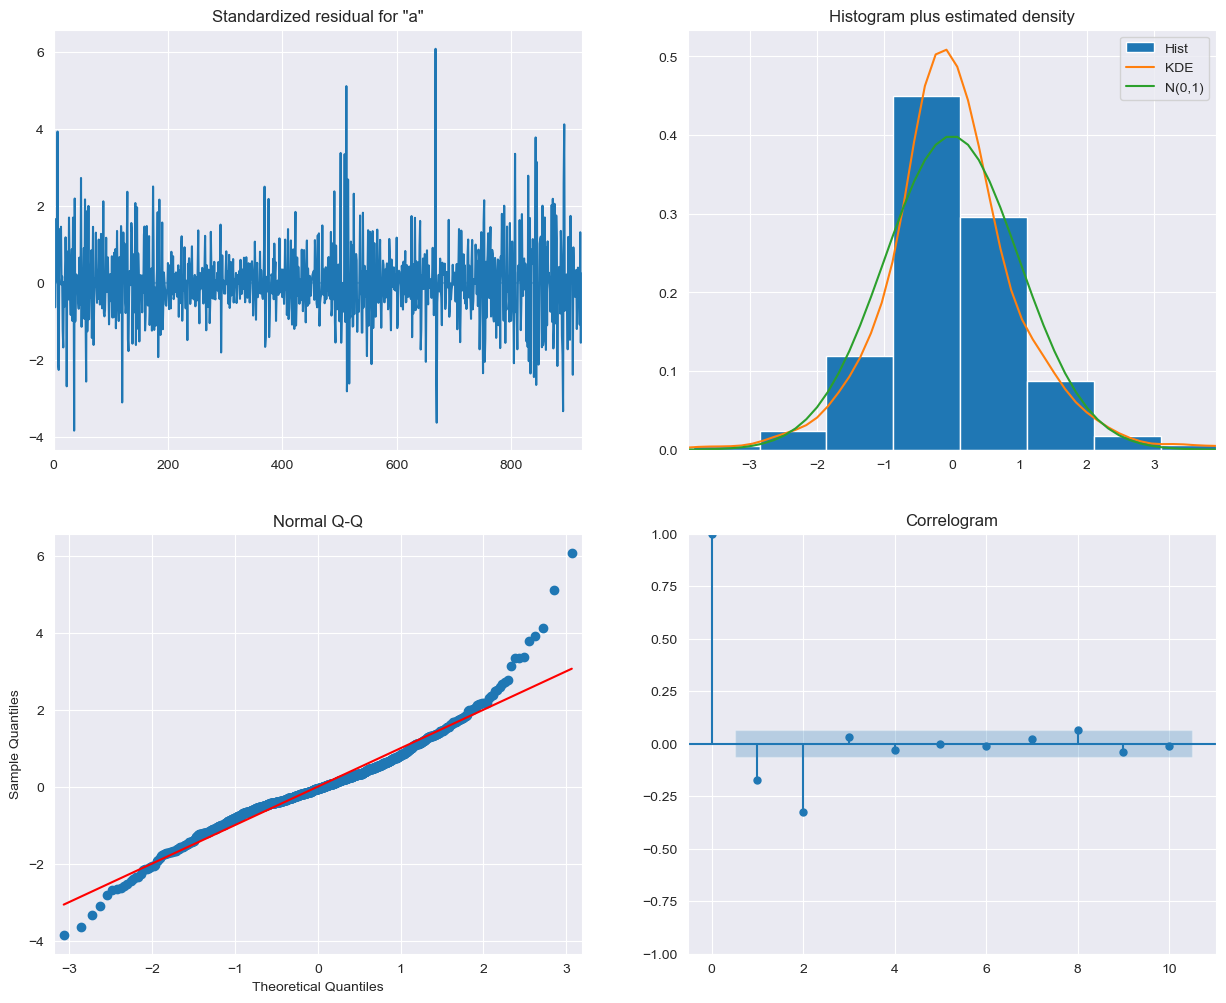

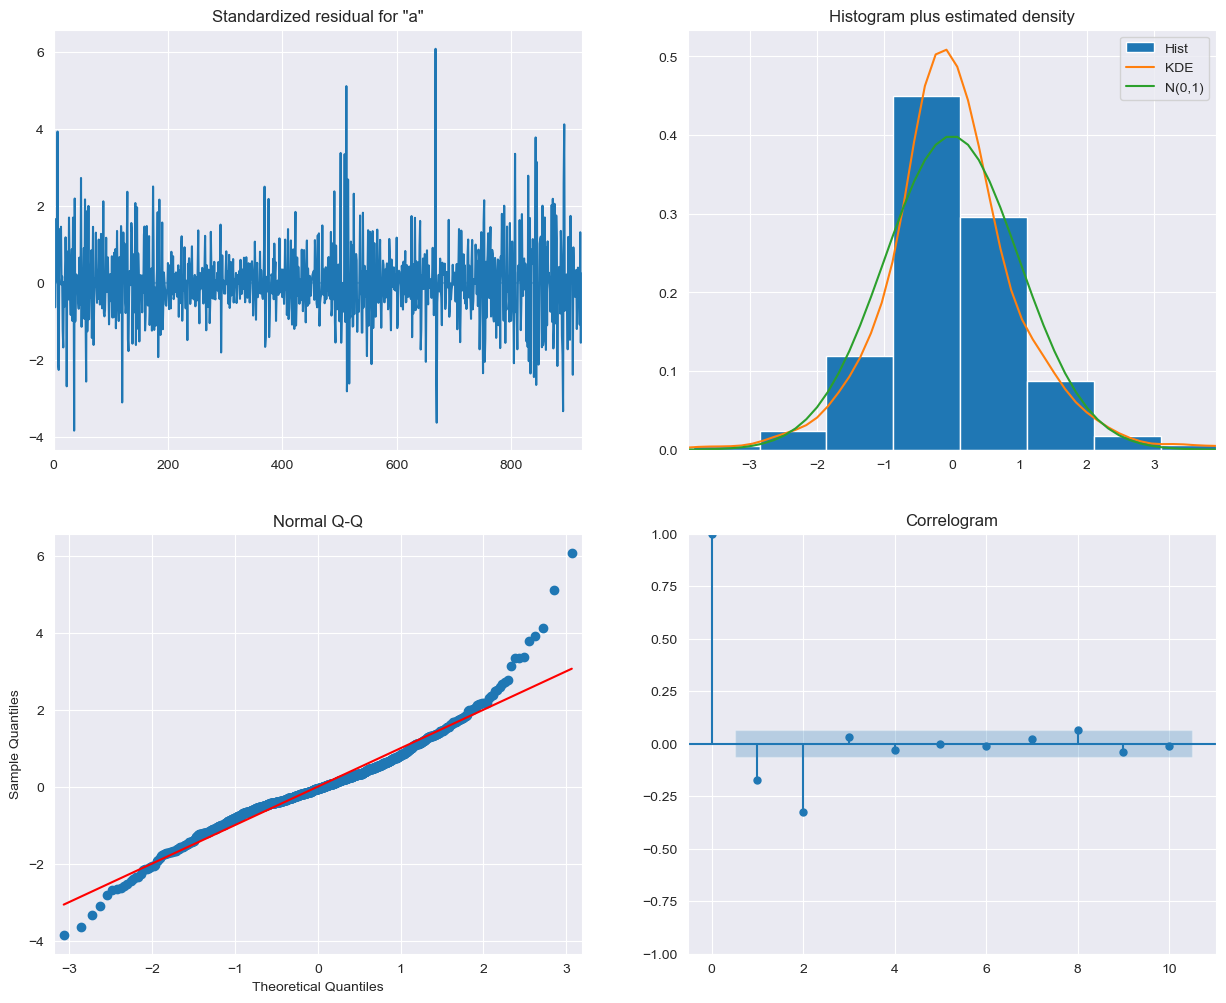

In [45]:
model_arima.plot_diagnostics(figsize=(15, 12))

In [47]:
# Let's try iterating over different combinations of p, d and q

aicVals2 = []
for p in range(5):  # we are searching for 5 p values
    for d in range(5): # and for each p value we are trying to find q values
        for q in range(5): # and for each q values we are trying to find d values
            print(f'p: {p}, d: {d}, q: {q}')
            aicVals.append([sm.ARIMA(df_hotel['adr'], order=(p,d,q)).fit().aic, p, d, q])

p: 0, d: 0, q: 0
p: 0, d: 0, q: 1
p: 0, d: 0, q: 2
p: 0, d: 0, q: 3
p: 0, d: 0, q: 4
p: 0, d: 1, q: 0
p: 0, d: 1, q: 1
p: 0, d: 1, q: 2
p: 0, d: 1, q: 3
p: 0, d: 1, q: 4
p: 0, d: 2, q: 0
p: 0, d: 2, q: 1
p: 0, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 3, q: 0
p: 0, d: 3, q: 1
p: 0, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 3, q: 3
p: 0, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 0
p: 0, d: 4, q: 1
p: 0, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 0, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 0
p: 1, d: 0, q: 1
p: 1, d: 0, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 1, d: 0, q: 4
p: 1, d: 1, q: 0
p: 1, d: 1, q: 1
p: 1, d: 1, q: 2
p: 1, d: 1, q: 3
p: 1, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 1, d: 2, q: 0
p: 1, d: 2, q: 1
p: 1, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 0
p: 1, d: 3, q: 1
p: 1, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 0
p: 1, d: 4, q: 1


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 1, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 0, q: 0
p: 2, d: 0, q: 1


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p: 2, d: 0, q: 2
p: 2, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 0
p: 2, d: 1, q: 1
p: 2, d: 1, q: 2
p: 2, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 2, q: 0
p: 2, d: 2, q: 1
p: 2, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 3, q: 0
p: 2, d: 3, q: 1
p: 2, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, d: 4, q: 0
p: 2, d: 4, q: 1
p: 2, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 2, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 0, q: 0
p: 3, d: 0, q: 1
p: 3, d: 0, q: 2
p: 3, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 0
p: 3, d: 1, q: 1
p: 3, d: 1, q: 2
p: 3, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 2, q: 0
p: 3, d: 2, q: 1
p: 3, d: 2, q: 2
p: 3, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 3, q: 0
p: 3, d: 3, q: 1
p: 3, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, d: 4, q: 0
p: 3, d: 4, q: 1
p: 3, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 3, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 0, q: 0
p: 4, d: 0, q: 1
p: 4, d: 0, q: 2
p: 4, d: 0, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 0, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 1, q: 0
p: 4, d: 1, q: 1
p: 4, d: 1, q: 2
p: 4, d: 1, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 1, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, d: 2, q: 0
p: 4, d: 2, q: 1
p: 4, d: 2, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 2, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 2, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 0
p: 4, d: 3, q: 1
p: 4, d: 3, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 3, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 0
p: 4, d: 4, q: 1
p: 4, d: 4, q: 2


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 3


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p: 4, d: 4, q: 4


C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
aicVals2.sort()
aicVals

[[9471.156399826039, 1, 1],
 [9471.714661927508, 4, 4],
 [9472.378265133722, 4, 3],
 [9472.45701698872, 1, 2],
 [9472.496226414085, 2, 1],
 [9473.79326595811, 2, 2],
 [9473.899624150725, 1, 3],
 [9473.925170105656, 3, 1],
 [9474.354998991763, 2, 3],
 [9474.393009810483, 3, 2],
 [9475.316245494092, 3, 3],
 [9475.796748127035, 4, 1],
 [9475.810560440585, 1, 4],
 [9476.273020393603, 4, 2],
 [9476.514982534203, 2, 4],
 [9477.842485370991, 3, 4],
 [9545.82437444069, 4, 0],
 [9570.424901650118, 3, 0],
 [9644.95954485923, 2, 0],
 [9718.404903545614, 0, 4],
 [9754.450445409208, 0, 3],
 [9770.271842812632, 1, 0],
 [9832.040800325722, 0, 2],
 [9922.072232527631, 0, 1],
 [10123.92911128542, 0, 0],
 [10123.92911128542, 0, 0, 0],
 [9922.072232527631, 0, 0, 1],
 [9832.040800325722, 0, 0, 2],
 [9754.450445409208, 0, 0, 3],
 [9718.404903545614, 0, 0, 4],
 [9983.02139029374, 0, 1, 0],
 [9460.987491601009, 0, 1, 1],
 [9462.484459728688, 0, 1, 2],
 [9464.116721854993, 0, 1, 3],
 [9465.9249936558, 0, 1, 4

No warnings here, the algorithm might run succesfully p: 0, d: 1, q: 1

# Sarimax

In [49]:
# Reset Index for train set
df_train.reset_index(drop=False, inplace=True)

In [50]:
# We will set a season order of 3 months as there is no clear seasonal pattern 
model_sarimax = SARIMAX(df_train['adr'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 3)).fit()

In [51]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               adr   No. Observations:                  740
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 3)   Log Likelihood               -3706.049
Date:                           Sat, 11 Nov 2023   AIC                           7418.098
Time:                                   19:33:09   BIC                           7431.901
Sample:                                        0   HQIC                          7423.421
                                           - 740                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8472      0.020    -42.221      0.000      -0.887      -0.808
ma.S.L3       -0.9976      0.024    -41.076      0.000      -1.045      -0.950
sigma2      1350.9390     37.319     36.200      0.000    1277.795    1424.083
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2157.80
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.29
Prob(H) (two-sided):                  0.82   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

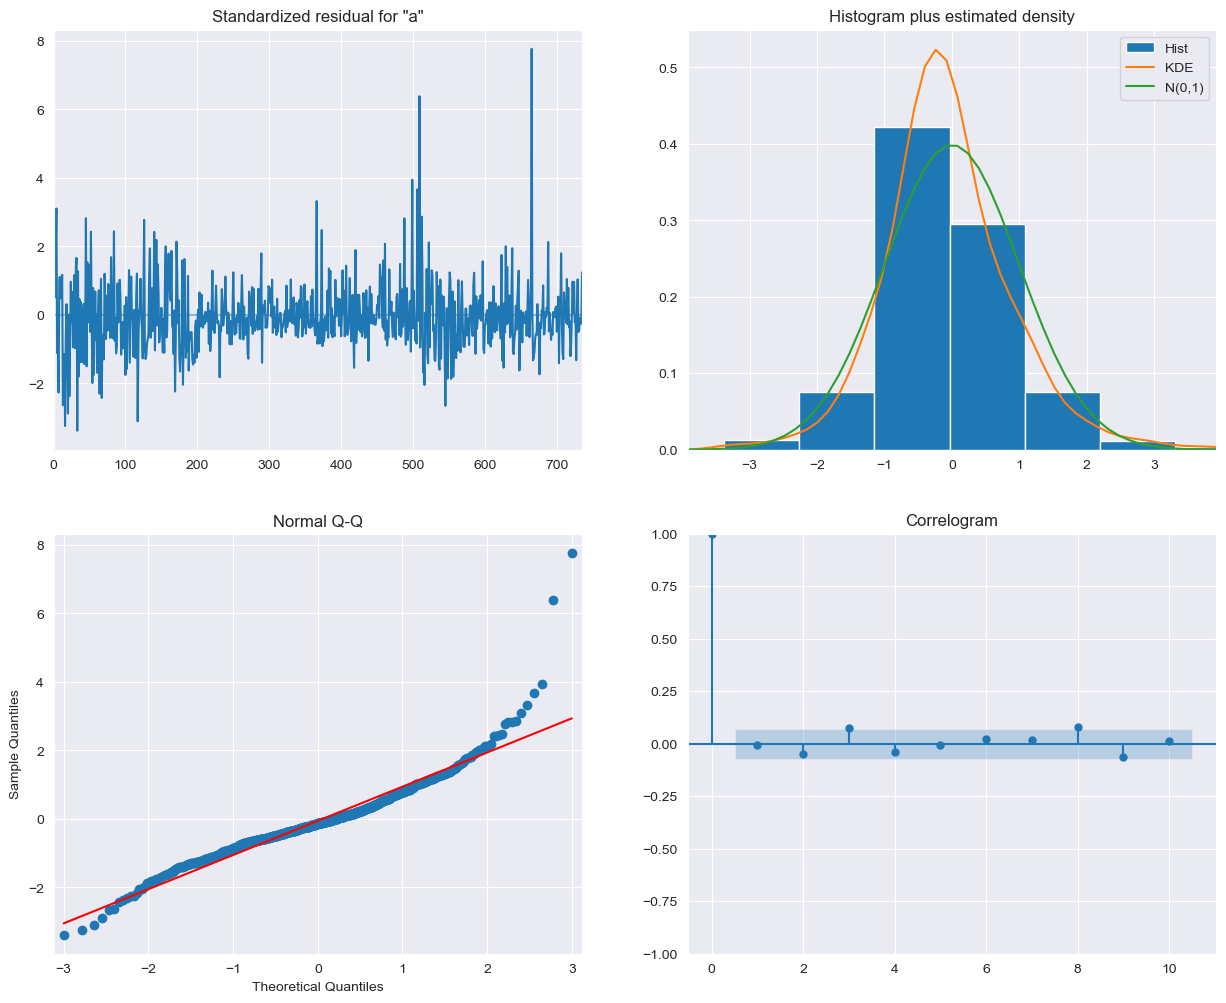

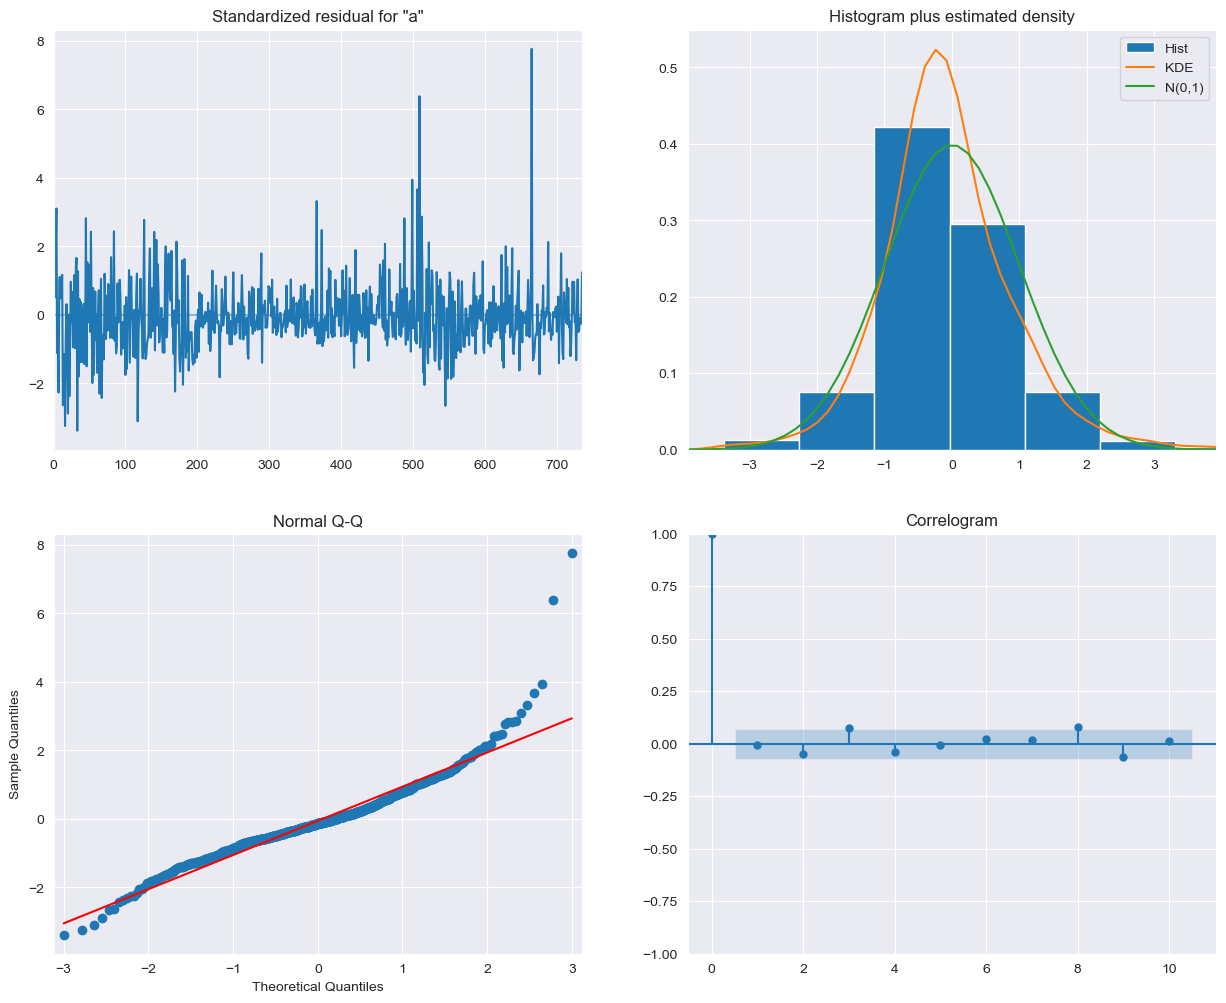

In [52]:
model_sarimax.plot_diagnostics(figsize=(15, 12))

## One-step-ahead forecasts of the last 10 observations

In [64]:
pred_time = 10

results = model_arima.forecast(pred_time)

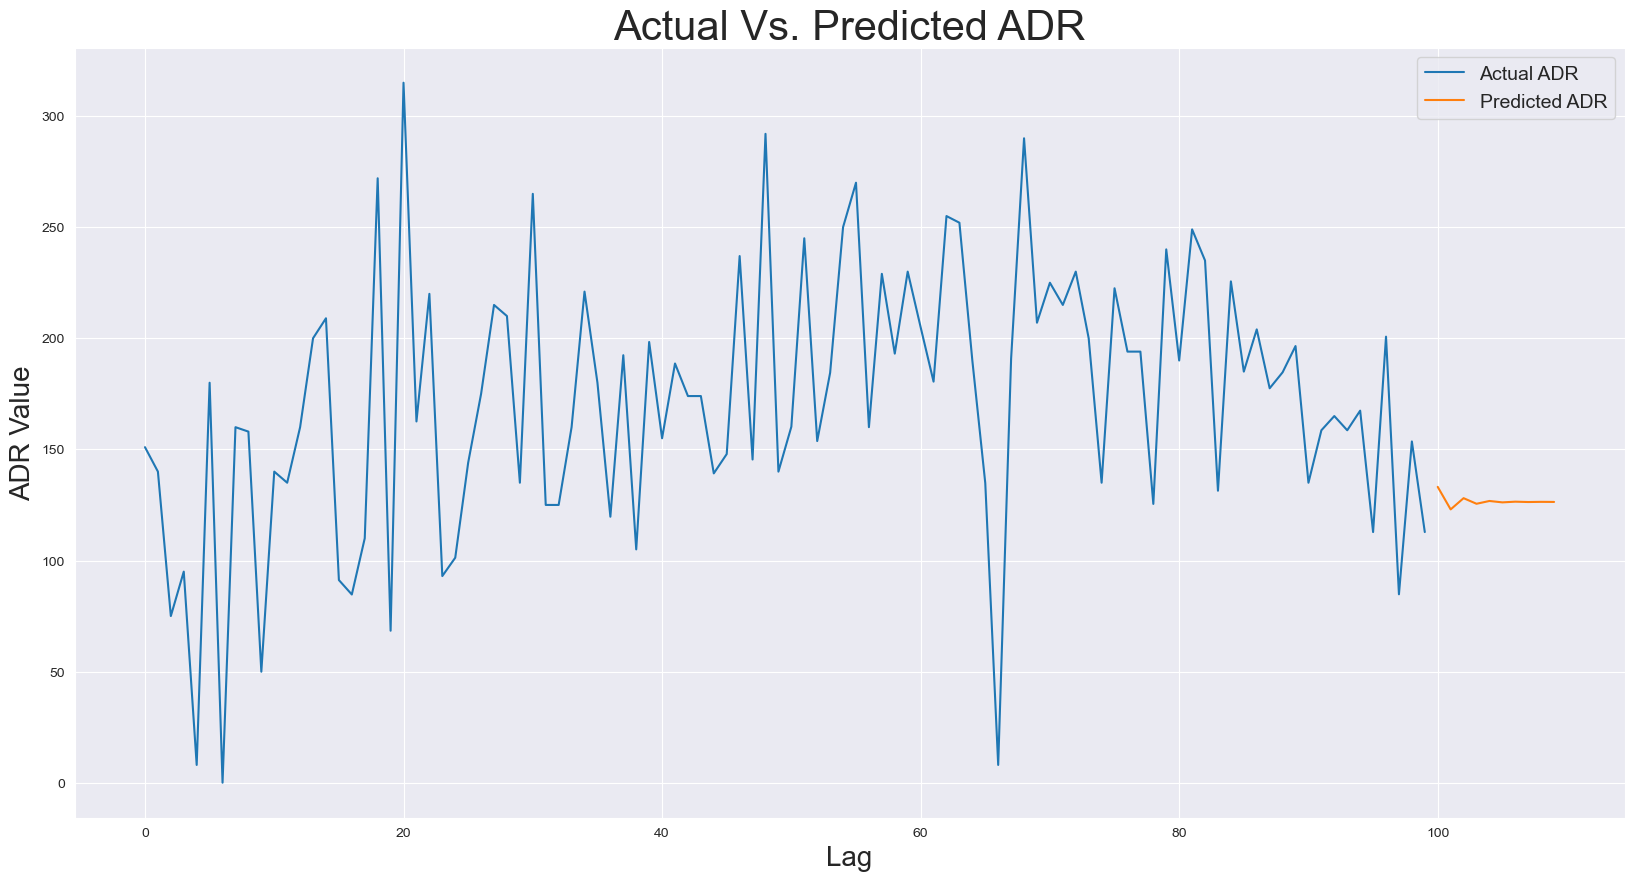

In [67]:
# Set the number of lags 100
lagsDisplayed = 100

plt.figure(figsize=(20, 10))

# Plot the actual ADR values
plt.plot(
    range(lagsDisplayed), 
    df_hotel['adr'][-lagsDisplayed:],
    label='Actual ADR'
)

# Plot the predicted ADR values.
plt.plot(
    range(lagsDisplayed, lagsDisplayed + pred_time), 
    results,
    label='Predicted ADR'
)

plt.title('Actual Vs. Predicted ADR', fontsize=30)
plt.xlabel('Lag', fontsize=20)
plt.ylabel('ADR Value', fontsize=20)

plt.legend(fontsize=14)

plt.show()

**It is clear from the plot that, after 100 lags, there is very minimal effect on response.**

In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error

# # Calculate forecast errors
# forecast_errors = df_hotel['adr'][-lagsDisplayed:] - results

# # Calculate R2 score
# r2 = r2_score(df_hotel['adr'][-lagsDisplayed:], results)

# # Calculate MSE
# mse = mean_squared_error(df_hotel['adr'][-lagsDisplayed:], results)

# # Print the results
# print(f'R2 Score: {r2:.2f}')
# print(f'Mean Squared Error (MSE): {mse:.2f}')

# Text Analytics
# Real-world dataset: Political Social Media

In [3]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 2127: invalid start byte

df_ts = pd.read_csv('political_social_media.csv', encoding='iso-8859-1')

In [4]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [5]:
df_ts.shape

(5000, 21)

In [6]:
df_ts.describe()

,_unit_id,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
count,5000.00,5000.00,5000.00,5000.00,5000.00,0.00,0.00,0.00,0.00
mean,766194985.16,1.03,1.00,0.99,1.00,NaN,NaN,NaN,NaN
std,1444.06,0.18,0.05,0.05,0.04,NaN,NaN,NaN,NaN
min,766192484.00,1.00,0.51,0.50,0.50,NaN,NaN,NaN,NaN
25%,766193734.75,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
50%,766194985.50,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
75%,766196235.25,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
max,766197486.00,3.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN


In [7]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 5000 non-null   object 
 8   bias:confidence      5000 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

In [8]:
df_ts.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'audience',
 'audience:confidence',
 'bias',
 'bias:confidence',
 'message',
 'message:confidence',
 'orig__golden',
 'audience_gold',
 'bias_gold',
 'bioid',
 'embed',
 'id',
 'label',
 'message_gold',
 'source',
 'text']

In [9]:
# The missing values will not affect the analysis
df_ts.isna().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                      0
bias:confidence           0
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

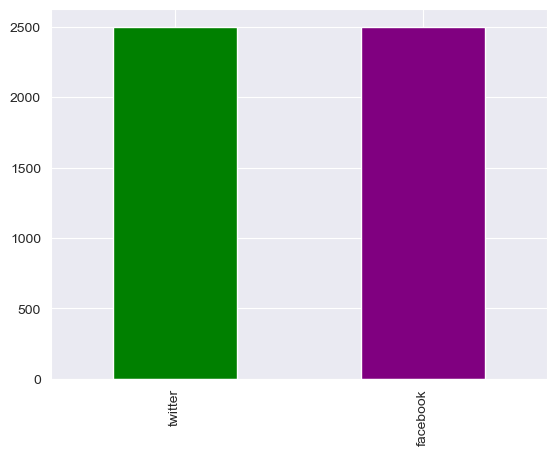

In [15]:
# Source is equally distributed
colors= ['green','purple']
df_ts['source'].value_counts().plot(kind='bar',color=colors);

In [9]:
# We will convert the Date & Time to 'datetime64'
df_ts['_last_judgment_at'].describe()

count            5000
unique            238
top       8/5/15 6:05
freq               60
Name: _last_judgment_at, dtype: object

In [10]:
# Rename '_last_judgment_at' to judgment_timestamp for redability

df_ts = df_ts.rename(columns={'_last_judgment_at': 'judgment_timestamp'})
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,judgment_timestamp,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [11]:
# Converting Dtype from 'object' to 'datetime64' to ensure accurate predictions on time series

df_ts['judgment_timestamp'] = pd.to_datetime(df_ts['judgment_timestamp'])
df_ts['judgment_timestamp'].head()

0   2015-08-04 21:17:00
1   2015-08-04 21:20:00
2   2015-08-04 21:14:00
3   2015-08-04 21:08:00
4   2015-08-04 21:26:00
Name: judgment_timestamp, dtype: datetime64[ns]

In [12]:
# Set index Date and Time
df_ts.set_index('judgment_timestamp', inplace=True)

In [13]:
df_ts.index

DatetimeIndex(['2015-08-04 21:17:00', '2015-08-04 21:20:00',
               '2015-08-04 21:14:00', '2015-08-04 21:08:00',
               '2015-08-04 21:26:00', '2015-08-04 21:06:00',
               '2015-08-04 21:07:00', '2015-08-04 20:51:00',
               '2015-08-04 20:57:00', '2015-08-04 21:14:00',
               ...
               '2015-08-05 05:12:00', '2015-08-05 04:59:00',
               '2015-08-05 05:36:00', '2015-08-05 05:45:00',
               '2015-08-05 05:39:00', '2015-08-05 06:05:00',
               '2015-08-05 05:57:00', '2015-08-05 05:10:00',
               '2015-08-05 06:08:00', '2015-08-05 05:04:00'],
              dtype='datetime64[ns]', name='judgment_timestamp', length=5000, freq=None)

In [14]:
df_ts.index.shape

(5000,)

In [15]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 21:17:00,766192484,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
2015-08-04 21:20:00,766192485,False,finalized,1,national,1.00,partisan,1.00,attack,1.00,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2015-08-04 21:14:00,766192486,False,finalized,1,national,1.00,neutral,1.00,support,1.00,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
2015-08-04 21:08:00,766192487,False,finalized,1,national,1.00,neutral,1.00,policy,1.00,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
2015-08-04 21:26:00,766192488,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


### Resampling: 5-minutes interval

In [16]:
dfr = df_ts.resample('5T')

In [17]:
dfr

In [18]:
dfr = dfr.count()
dfr.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 20:00:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-04 20:05:00,24,24,24,24,24,24,24,24,24,24,0,0,0,24,24,24,24,0,24,24
2015-08-04 20:10:00,40,40,40,40,40,40,40,40,40,40,0,0,0,40,40,40,40,0,40,40
2015-08-04 20:15:00,52,52,52,52,52,52,52,52,52,52,0,0,0,52,52,52,52,0,52,52
2015-08-04 20:20:00,68,68,68,68,68,68,68,68,68,68,0,0,0,68,68,68,68,0,68,68


In [19]:
dfr.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-05 14:35:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-05 14:40:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4
2015-08-05 14:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:55:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4


### Plotting the data resampled at 5-minute interval frequency

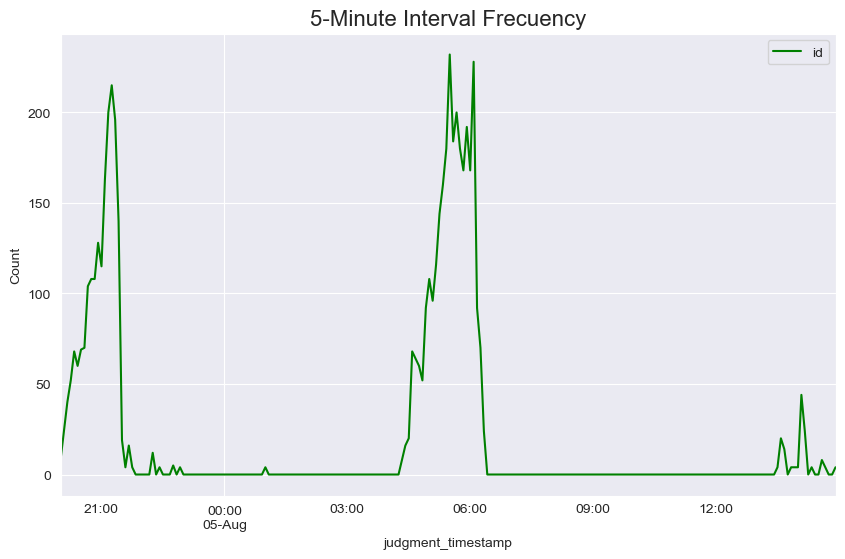

In [20]:
df_ts.resample('5T').count().plot(y='id', figsize=(10,6), color='g')
plt.title('5-Minute Interval Frecuency', fontsize=16)
plt.ylabel('Count')
plt.show();

#  Feature Extraction: Bag of Words

In [21]:
# Reset Index
df_ts.reset_index(drop=True, inplace=True)

In [22]:
text = df_ts['text']
text

0       RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1       VIDEO - #Obamacare:  Full of Higher Costs and ...
2       Please join me today in remembering our fallen...
3       RT @SenatorLeahy: 1st step toward Senate debat...
4       .@amazon delivery #drones show need to update ...
                              ...                        
4995    I applaud Governor PerryÛªs recent decision t...
4996    Today, I voted in favor of H.R. 5016 - Financi...
4997    (Taken from posted WOKV interview)   Congressm...
4998    Join me next week for a town hall in Ocala! I'...
4999    Foreign Affairs Committee Hearing on Syria. I ...
Name: text, Length: 5000, dtype: object

In [23]:
type(df_ts['text'])

pandas.core.series.Series

## Clean Text Data

In [46]:
# Instantiate an object cv by calling a method named as CountVectorzer()
# Tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 1),
                     tokenizer = token.tokenize, dtype=np.float32)
cv

CountVectorizer(dtype=<class 'numpy.float32'>, stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)

In [48]:
text_counts= cv.fit_transform(text)
text_counts

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<5000x17739 sparse matrix of type '<class 'numpy.float32'>'
	with 92905 stored elements in Compressed Sparse Row format>

In [49]:
# Train the dataset by calling a fit_transform() method
X = cv.fit_transform(text).toarray()

# Display the rows and colums
X.shape

(5000, 17739)

In [50]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(text_counts, text, test_size=0.3, random_state=42)

In [51]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (5000, 17739)
Number of rows and columns after splitting dataset:  (3500, 17739) (1500, 17739) (3500,) (1500,)


In [52]:
# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [53]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [54]:
# Call predict() method
y_pred = model.predict(X_test)

In [55]:
# Instantiate a the classification report
report_cv = classification_report(y_test, y_pred)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [56]:
# Display the values of the report
print(report_cv)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
CF = confusion_matrix(y_test, y_pred)

print(CF)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.0
Precision: 0.0
Recall: 0.0


## TF-IDF

In [42]:
# Create an object 'tfidf' by calling a method TfidfVectorizer()
tfidf = sk_txt.TfidfVectorizer(stop_words = 'english', dtype=np.float32)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(text).toarray()

In [43]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, text, test_size = 0.30, random_state=42)

In [44]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (5000, 17739)
Number of rows and columns after splitting dataset:  (3500, 17951) (1500, 17951) (3500,) (1500,)


In [37]:
# Instantiate an object model by calling a method MultinomialNB()
model_tfidf = MultinomialNB()

In [38]:
# Train the model by calling a method fit()
model_tfidf.fit(X_train, y_train)

MultinomialNB()

In [39]:
# Call predict() method
y_pred = model_tfidf.predict(X_test)

In [40]:
# Instantiate a the classification report
report_tfidf = classification_report(y_test, y_pred)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [41]:
# Display the values of the report
print(report_tfidf)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

